In [1]:
#import libraries 

# to handle data in form of rows and column 
import pandas as pd
# numerical libraries
import numpy as np
#ploting libraries
import matplotlib.pyplot as plt
# seaborn for statistical plot 
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading csv file into pandas dataframe
thera_df=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [4]:
# check top few records to get feel of data structure
thera_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [5]:
thera_df.shape

(5000, 14)

In [6]:
thera_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
# sample of data to drop if any missing values are there
print("Total missing values in TheraBank database is = " + str(thera_df.isnull().sum().sum()))

Total missing values in TheraBank database is = 0


In [8]:
# drop ZIP code column as it is not useful for model
thera_df=thera_df.drop('ZIP Code',axis=1)
thera_df.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [9]:
thera_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


- Above table showes minimum value of Experience is -3 means negative values are present, experience could not be negative.
    Need to replace negative values by its absolute values as it is not valid count for experience.
 #### Distribution
- Age, Experience -> Mean = Median, Symmetrical distribution 
-  Income -> Mean > Median, Positive/Right Skewed
#### Outliers 
- Income,CCavg,Mortgage Outliers are Present in high end distribution.


In [10]:
#finding negative values 
thera_df.lt(0).sum()

ID                     0
Age                    0
Experience            52
Income                 0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

- total count of negative values in experience column =52

In [11]:
# Replacing negative values by its absolute values
thera_df['Experience'] = thera_df['Experience'].abs()

In [12]:
# checking still any negative value present in experience column 
thera_df['Experience'].lt(0).sum()

0

### Data Distribution in each attribute

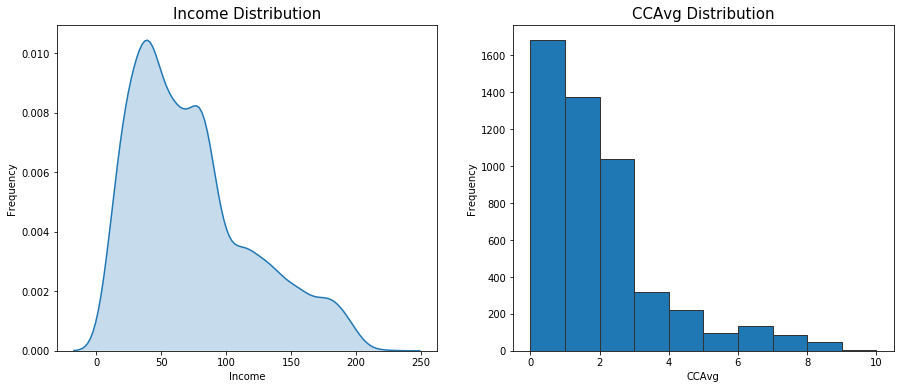

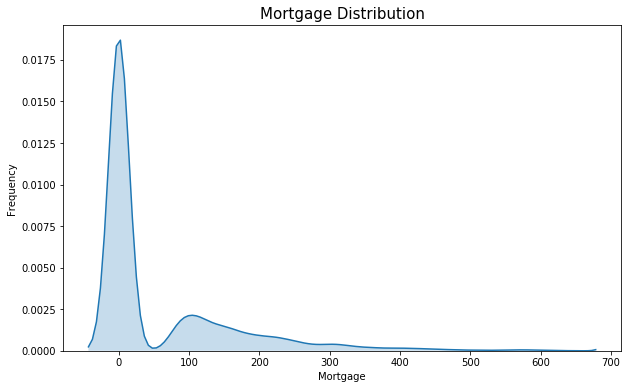

In [13]:
# Distribution of ‘Income’, ‘CCAvg’ and ‘Mortage’ columns
fig21, (ax21,ax22) = plt.subplots(1,2)
fig21.set_size_inches(15,6)

# histogram of the Income distribution
sns.kdeplot(thera_df['Income'], ax=ax21, shade=True, legend=False)
ax21.set_xlabel("Income")
ax21.set_ylabel("Frequency", fontsize=10)
ax21.set_title("Income Distribution", fontsize=15)

#Histogram of the CCAvg distribution
ax22.hist('CCAvg', data=thera_df, bins=10, edgecolor='0.2')
ax22.set_xlabel("CCAvg", fontsize=10)
ax22.set_ylabel("Frequency", fontsize=10)
ax22.set_title("CCAvg Distribution", fontsize=15)

#Subplot for the Mortgage distribution

fig22, ax23 = plt.subplots()
fig22.set_size_inches(10,6)

#Density plot of Mortage distribution
sns.kdeplot(thera_df['Mortgage'], ax=ax23, shade=True, legend=False)
ax23.set_xlabel("Mortgage", fontsize=10)
ax23.set_ylabel("Frequency", fontsize=10)
ax23.set_title("Mortgage Distribution", fontsize=15);


- Income CCavg and Mortgage are right/positive skewed. 

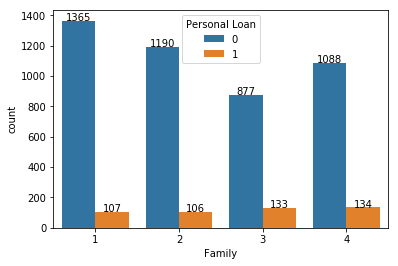

In [14]:
ax=sns.countplot(x="Family",hue="Personal Loan",data=thera_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2,'{0:0}'.format(height),ha="center") 

- families with size of 3 or 4 are more likely to take loan. When considering future campaign this might be good association.

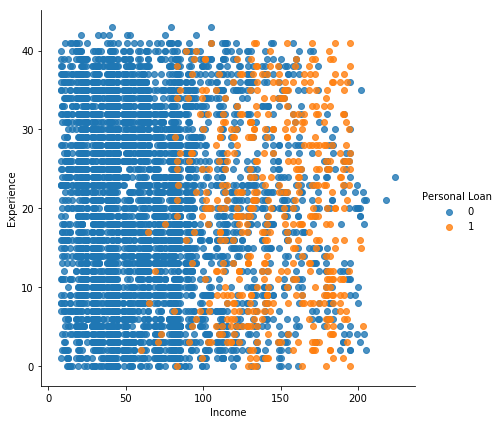

In [15]:
sns.lmplot(x='Income', y='Experience', hue='Personal Loan', data=thera_df, scatter=True,fit_reg=False, size=6)
plt.show()

- Potential customers lies in high income range irrespective of No of yr Experience. 

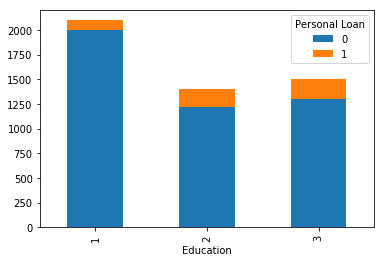

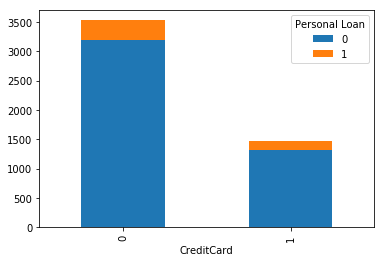

In [16]:
ct = pd.crosstab(thera_df['Education'],thera_df['Personal Loan'])
ct.plot.bar(stacked=True)
ct1 = pd.crosstab(thera_df['CreditCard'],thera_df['Personal Loan'])
ct1.plot.bar(stacked=True)
plt.legend(title='Personal Loan')

plt.show()

- The customers who are graduates and Advanced/Professional are having loan rather than the one who are Undergraduates. 
- The percentage of Customers who are not having creditcard are having loan is more.

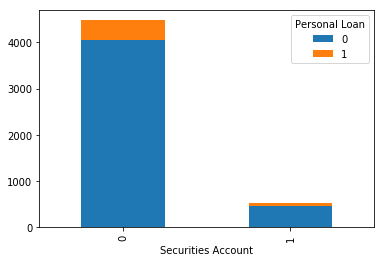

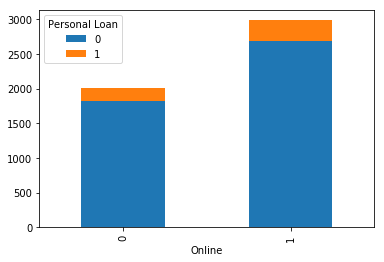

In [17]:
ct = pd.crosstab(thera_df['Securities Account'],thera_df['Personal Loan'])
ct.plot.bar(stacked=True)
ct1 = pd.crosstab(thera_df['Online'],thera_df['Personal Loan'])
ct1.plot.bar(stacked=True)
plt.legend(title='Personal Loan')

plt.show()

- Customers who are not having Securities Account and using internet banking facilities are taking personal loan.


In [18]:
print('Credit card spending of Non-Loan customers: ',thera_df[thera_df['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', thera_df[thera_df['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


- Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

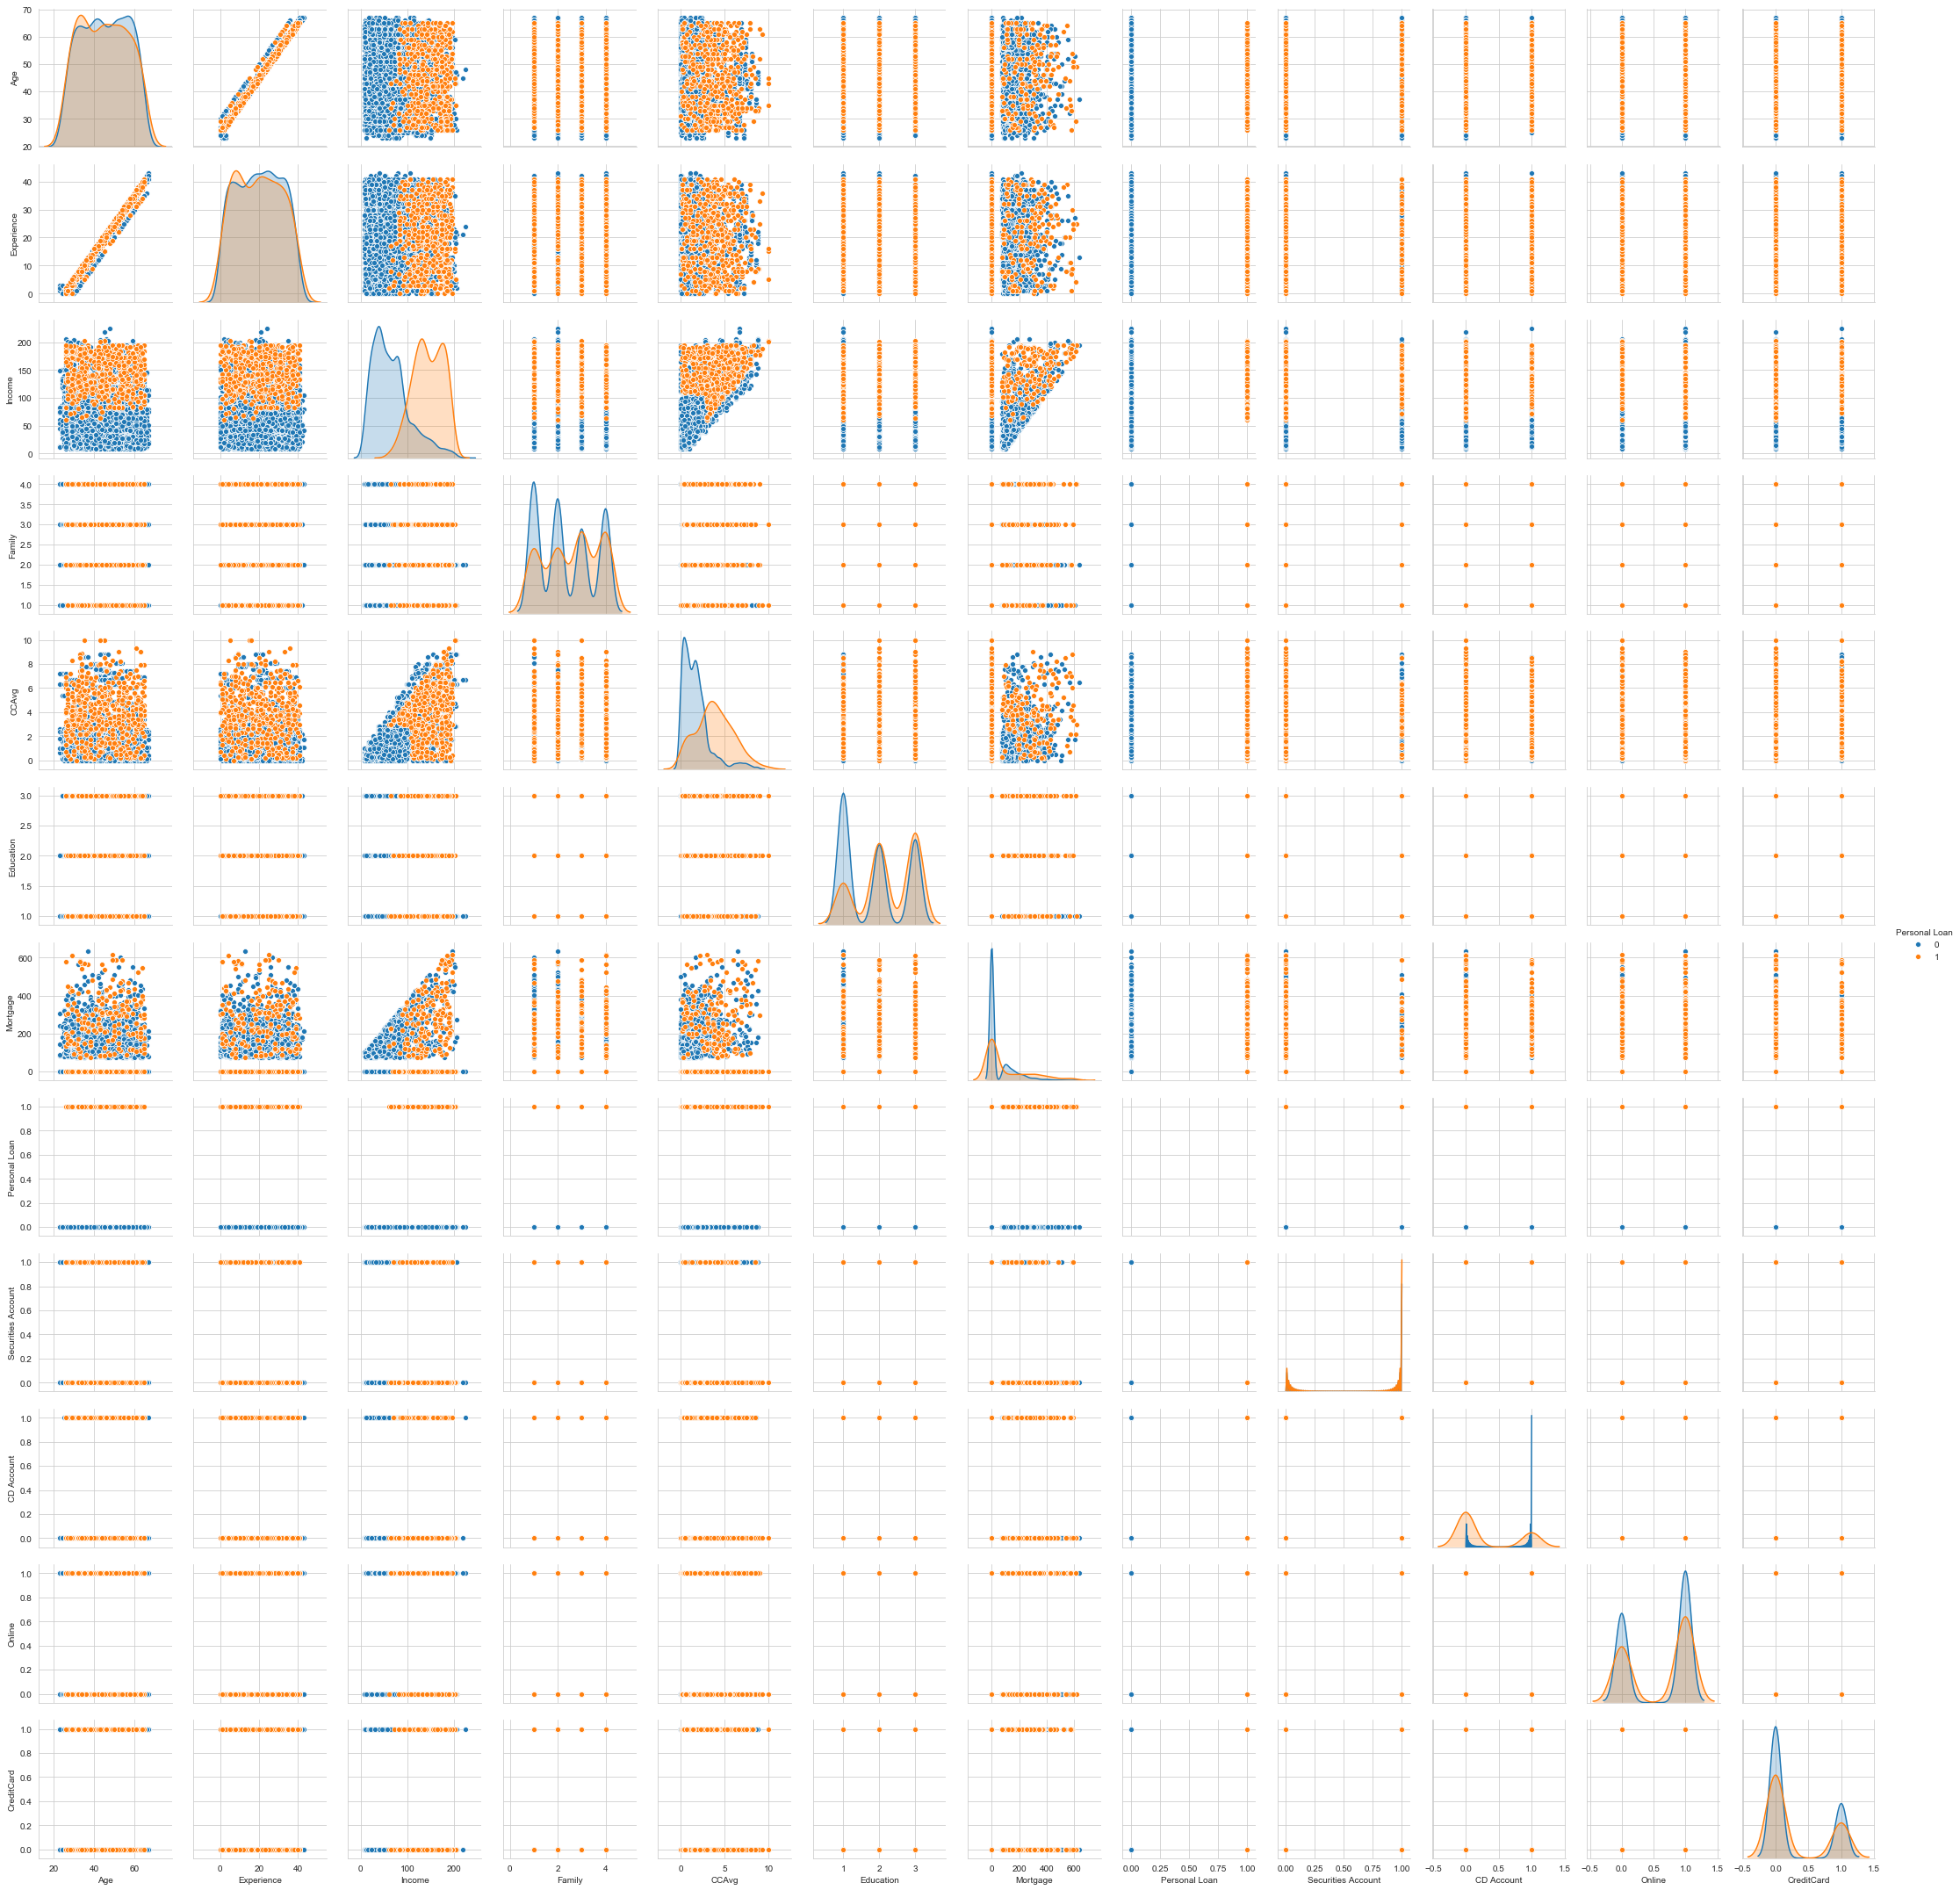

In [19]:
sns.set_style("whitegrid")
sns.pairplot(thera_df.drop("ID", axis=1), hue='Personal Loan');

- Attributes which look normally distributed are Age,experience,online and credictcard.
- Some of the attributes look like they may have an exponential distribution (Income,CCAvg,Mortgage).
- In Age and Experience distribution is overlapping hard to distinguish.
#### Income and CCavg are good predictor to find potential customers as distribution is well seperated.


In [20]:
thera_df.corr()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.016797,-0.046418,-0.051851,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.016972,-0.000436,-0.000989,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


- Age and Experience are higly correlated.
- Income and CCAvg are having good correlation.

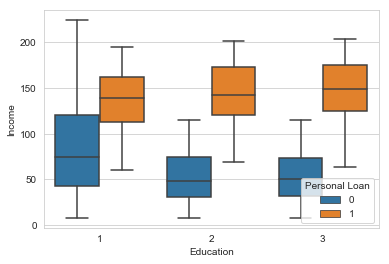

In [21]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=thera_df)

- Customers who are undergraduate are having more Income. However customers who has taken the personal loan have the same income levels

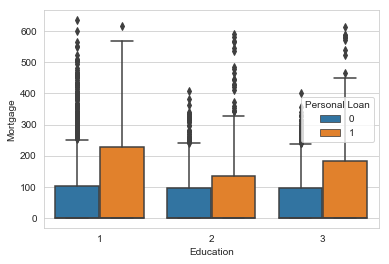

In [22]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=thera_df)

- Customers with and without Personal loan have high mortage.

### Slicing data set for Independent variables and dependent variables

In [23]:
X=thera_df.drop(columns=['Personal Loan','ID'])
y=thera_df['Personal Loan']

### Distribution of  target column

In [24]:
thera_df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

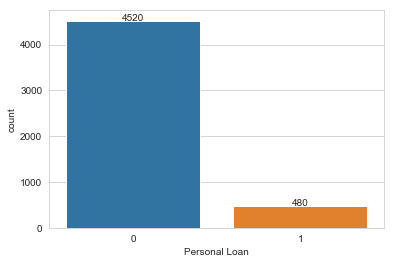

In [25]:
ax = sns.countplot(x="Personal Loan", data=thera_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,'{0:0}'.format(height),ha="center") 

#### Insights ->

- Out of 5000 customers, only 480 (= 9.6%) accepted the personal loan. 

### Split the data into training and test set in the ratio of 70:30 

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)

## Classification models to predict the likelihood of a liability customer buying personal loans 

### Model Implementation using LogisticRegression (Testing the Accuracy and Printing Confusion Matrix)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logRegr = LogisticRegression()
logRegr.fit(scaledX_train, y_train)
predicted = logRegr.predict(scaledX_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.85      0.58      0.69       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.95      0.95      0.94      1500



In [29]:
#Accuracy of Training and test sets
score_train = logRegr.score(scaledX_train, y_train)
print("Training Accuracy",score_train)
score_test = logRegr.score(scaledX_test, y_test)
print("Testing Accuracy",score_test)


Training Accuracy 0.9531428571428572
Testing Accuracy 0.9486666666666667


- Accuracy of a liability customer buying personal loans is 94.86%

In [30]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predicted))

[[1336   15]
 [  62   87]]


##### Analyzing the confusion matrix
- True Positives (TP): we correctly predicted that customer that taken loan 87
- True Negatives (TN): we correctly predicted that they don't have loan 1336
- False Positives (FP): we incorrectly predicted that they do have taken loan (a "Type I error") 15 Falsely predict positive Type I error
- False Negatives (FN): we incorrectly predicted that they don't have loan (a "Type II error") 62 Falsely predict negative Type II error

### Model Implementation using KNN (Testing the Accuracy and Printing Confusion Matrix)

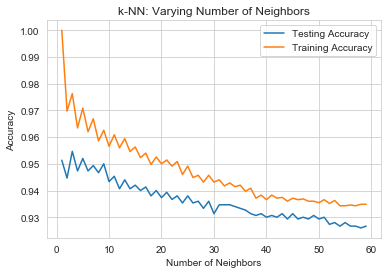

Best accuracy of testing is 0.9546666666666667 with K = 3


In [31]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
neighbors =np.arange(1,60)
train_accuracy_plot = []
test_accuracy_plot = []

#loop for different values of K
for i, k in enumerate(neighbors):
   
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    predictions = knn.predict(scaledX_test)
    train_accuracy_plot.append(knn.score(scaledX_train,y_train))
    test_accuracy_plot.append(knn.score(scaledX_test,y_test))
    
#Creating Plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#value of k at max accuracy 
print("Best accuracy of testing is {} with K = {}".format(np.max(test_accuracy_plot),1+test_accuracy_plot.index(np.max(test_accuracy_plot))))

- Accuracy of a liability customer buying personal loans is 95.46%

In [32]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1351
           1       0.95      0.28      0.43       149

   micro avg       0.93      0.93      0.93      1500
   macro avg       0.94      0.64      0.69      1500
weighted avg       0.93      0.93      0.91      1500



In [33]:
# Printing confusion matrix
print(metrics.confusion_matrix(y_test, predictions))

[[1349    2]
 [ 108   41]]


 ##### Analyzing the confusion matrix
- True Positives (TP): we correctly predicted that customer that taken loan 41
- True Negatives (TN): we correctly predicted that they don't have loan 1349
- False Positives (FP): we incorrectly predicted that they do have taken loan (a "Type I error") 2 Falsely predict positive Type I error
- False Negatives (FN): we incorrectly predicted that they don't have loan (a "Type II error") 108 Falsely predict negative Type II error

### Model Implementation using Naïve Bayes (Testing the Accuracy and Printing Confusion Matrix)

In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(scaledX_train, y_train)
print(model)
# make predictions
predicted = model.predict(scaledX_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.56      0.47       149

   micro avg       0.87      0.87      0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



In [35]:
#Accuracy of Training and test sets
score_train = model.score(scaledX_train, y_train)
print("Training Accuracy",score_train)
score_test = model.score(scaledX_test, y_test)
print("Testing Accuracy",score_test)

Training Accuracy 0.89
Testing Accuracy 0.8746666666666667


- Accuracy of a liability customer buying personal loans is 87.46%

In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted)
print(cm)

[[1228  123]
 [  65   84]]


##### Analyzing the confusion matrix
- True Positives (TP): we correctly predicted that customer that taken loan 84
- True Negatives (TN): we correctly predicted that they don't have loan 1228
- False Positives (FP): we incorrectly predicted that they do have taken loan (a "Type I error") 123 Falsely predict positive Type I error
- False Negatives (FN): we incorrectly predicted that they don't have loan (a "Type II error") 65 Falsely predict negative Type II error

### COMPARISON OF LOAN SANCTION PREDICTION MODEL

In [37]:
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), ('KNN', KNeighborsClassifier()),('GaussianNB', GaussianNB())]

In [38]:
from sklearn import model_selection
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=20)
    results = model_selection.cross_val_score(model, X, y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

LogReg| Mean=0.949600 STD=0.006621
KNN| Mean=0.912600 STD=0.008535
GaussianNB| Mean=0.883200 STD=0.011496


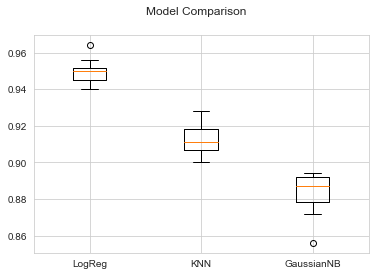

In [39]:
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()


- Out of all three models(Logistic, K-NN and Naïve Bayes) K-NN gives maximum accuracy but at the same time from confusion matrix it is seen that it has higher error count 110.In large datasets, the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm.
- Naive Byes gives maximum error count of 188 with less accuracy as compare to other two.
- Logistic Regression is best model as it is having appr. 95% accuracy, less error count(77), high positive prediction(87)
- In this case Type I error is risk, customer wish to take loan but model detecting it as not potential customer. Type I error is less in Logistic Regression as compare to other two models.
##### From the confusion matrix,cross validation and boxplot it looks like the Logistic Regression Analysis method is providing the best results with the better accuracies.
